# **General Steps**

In [3]:
import pandas as pd
df = pd.read_csv("../clean_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,target,text,num_words,num_sentence,num_characters,transformed_text
0,0,1,viiiiiiagraaaa\nonly for the ones that want to...,60,6,403,viiiiiiagraaaa one want make scream prodigi sc...
1,1,0,got ice thought look az original message ice o...,60,1,530,got ice thought look az origin messag ice oper...
2,2,1,yo ur wom an ne eds an escapenumber in ch ma n...,48,1,215,yo ur wom ne ed escapenumb ch n b e th n f h e...
3,3,1,start increasing your odds of success & live s...,69,5,345,start increas odd success live sexual healthi ...
4,4,0,author jra date escapenumber escapenumber esca...,467,1,3097,author jra date escapenumb escapenumb escapenu...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [7]:
print(df['transformed_text'].isnull().sum())

91


In [8]:
df = df.dropna(subset=['transformed_text'])

In [9]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# **1 Logistic Regression**

# **2 Linear SVC** 

Accuracy: 0.9393321635012386
Precision: 0.9303624161073826
ROC-AUC: 0.9838970157515193
R² Score: 0.7566883186562681


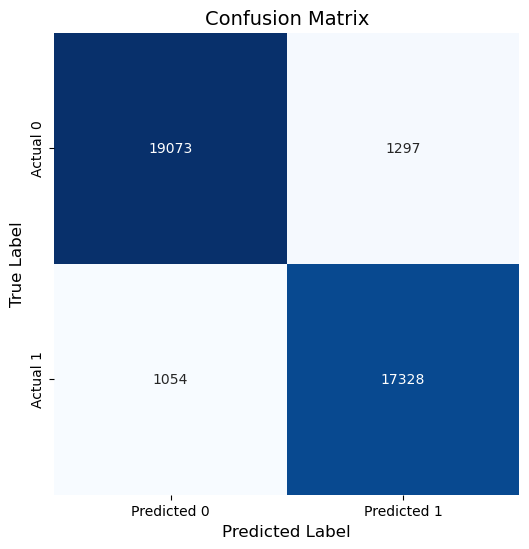

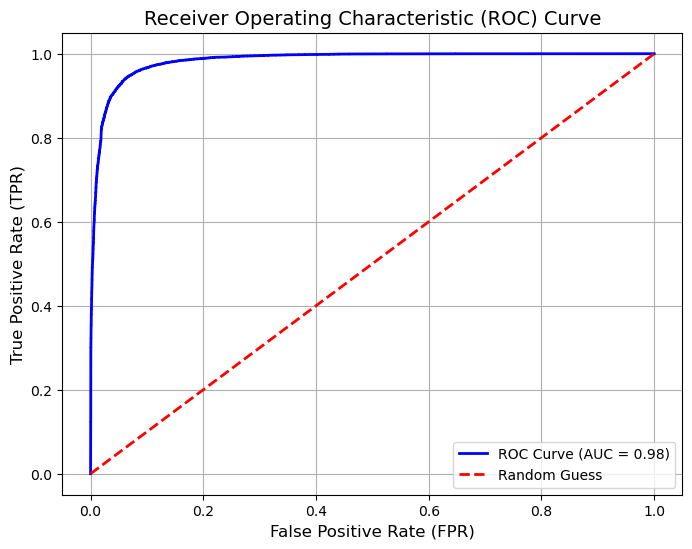

Results saved in the folder: SVC_Results


In [12]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, r2_score
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a folder to save results
folder_name = "SVC_Results"
os.makedirs(folder_name, exist_ok=True)

# Reduce dimensionality (if needed)
svd = TruncatedSVD(n_components=100)  # Reduce to 100 components
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Initialize and train the LinearSVC model with probability calibration
svc = CalibratedClassifierCV(LinearSVC(random_state=42), method='sigmoid')
svc.fit(X_train_reduced, y_train)

# Make predictions
y_pred = svc.predict(X_test_reduced)
y_pred_prob = svc.predict_proba(X_test_reduced)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)
print("R² Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# Save evaluation metrics to a text file
with open(os.path.join(folder_name, "Evaluation_Metrics.txt"), "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"ROC-AUC: {auc_score}\n")
    f.write(f"R² Score: {r2}\n")

print(f"Results saved in the folder: {folder_name}")